In [29]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

In [2]:
from pylab import rcParams

In [3]:
from statsmodels import tsa

In [4]:
import  scipy.signal.signaltools

def _centered(arr, newsize):
    # Return the center newsize portion of the array.
    newsize = np.asarray(newsize)
    currsize = np.array(arr.shape)
    startind = (currsize - newsize) // 2
    endind = startind + newsize
    myslice = [slice(startind[k], endind[k]) for k in range(len(endind))]
    return arr[tuple(myslice)]

scipy.signal.signaltools._centered = _centered

In [5]:
from statsmodels.tsa.seasonal import  seasonal_decompose

In [216]:
rcParams['figure.figsize']= 15,8

In [7]:
s= pd.read_excel('Quote-Equity-ASIANPAINT-EQ-02-04-2020-to-02-04-2022 b.xlsx')
s.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades,sort
0,2020-04-03,EQ,1615.1,1616.00,1517.25,1603.20,1522.00,1520.90,1536.04,1916.7,1291.25,2925847,4.494204e+09,134230,497
1,2020-04-07,EQ,1540.0,1635.00,1538.00,1520.90,1625.20,1623.80,1597.81,1916.7,1291.25,2733614,4.367787e+09,123428,496
2,2020-04-08,EQ,1623.8,1687.80,1600.00,1623.80,1608.00,1608.95,1642.03,1916.7,1291.25,2382216,3.911659e+09,101146,495
3,2020-04-09,EQ,1640.0,1678.90,1618.95,1608.95,1644.05,1651.35,1653.37,1916.7,1291.25,1489546,2.462772e+09,69005,494
4,2020-04-13,EQ,1646.0,1703.65,1602.85,1651.35,1664.50,1680.85,1651.58,1916.7,1291.25,2586216,4.271342e+09,118296,493


In [8]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           497 non-null    datetime64[ns]
 1   series         497 non-null    object        
 2   OPEN           497 non-null    float64       
 3   HIGH           497 non-null    float64       
 4   LOW            497 non-null    float64       
 5   PREV. CLOSE    497 non-null    float64       
 6   ltp            497 non-null    float64       
 7   close          497 non-null    float64       
 8   vwap           497 non-null    float64       
 9   52W H          497 non-null    float64       
 10  52W L          497 non-null    float64       
 11  VOLUME         497 non-null    int64         
 12  VALUE          497 non-null    float64       
 13  No of trades   497 non-null    int64         
 14  sort           497 non-null    int64         
dtypes: datetime64[ns](1), f

In [9]:
s.columns

Index(['Date ', 'series ', 'OPEN ', 'HIGH ', 'LOW ', 'PREV. CLOSE ', 'ltp ',
       'close ', 'vwap ', '52W H ', '52W L ', 'VOLUME ', 'VALUE ',
       'No of trades ', 'sort'],
      dtype='object')

In [10]:
df= s[['Date ', 'close ']] 
df.head()

,Date,close
0,2020-04-03,1520.90
1,2020-04-07,1623.80
2,2020-04-08,1608.95
3,2020-04-09,1651.35
4,2020-04-13,1680.85


In [11]:
df.tail()

,Date,close
492,2022-03-28,3027.45
493,2022-03-29,3042.60
494,2022-03-30,3081.55
495,2022-03-31,3079.95
496,2022-04-01,3114.15


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    497 non-null    datetime64[ns]
 1   close   497 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.9 KB


In [13]:
df.rename(columns = {'close ':'close', 'Date ':'Date'}, inplace = True)

In [14]:
df.head()

,Date,close
0,2020-04-03,1520.90
1,2020-04-07,1623.80
2,2020-04-08,1608.95
3,2020-04-09,1651.35
4,2020-04-13,1680.85


In [15]:
df.columns

Index(['Date', 'close'], dtype='object')

In [16]:
df.set_index(keys= 'Date', drop=True, inplace= True)
df.head()

,close
Date,
2020-04-03,1520.90
2020-04-07,1623.80
2020-04-08,1608.95
2020-04-09,1651.35
2020-04-13,1680.85


<AxesSubplot:xlabel='Date'>

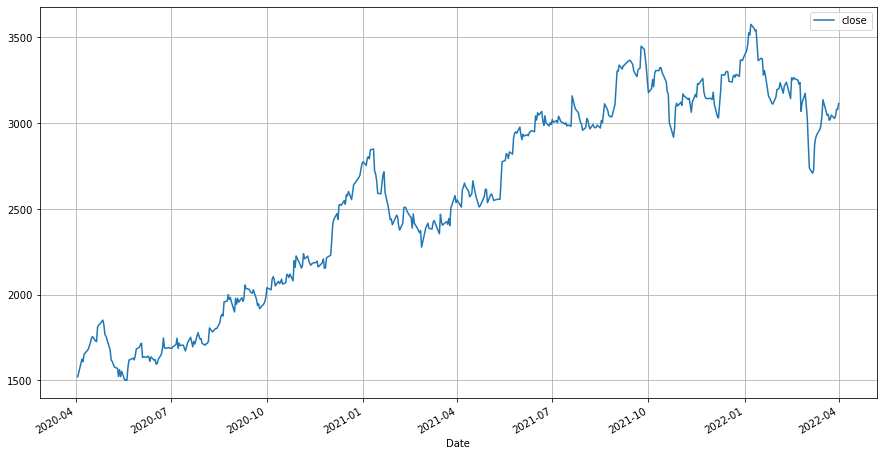

In [17]:
df.plot(grid=True)

## Decomposition : Additive

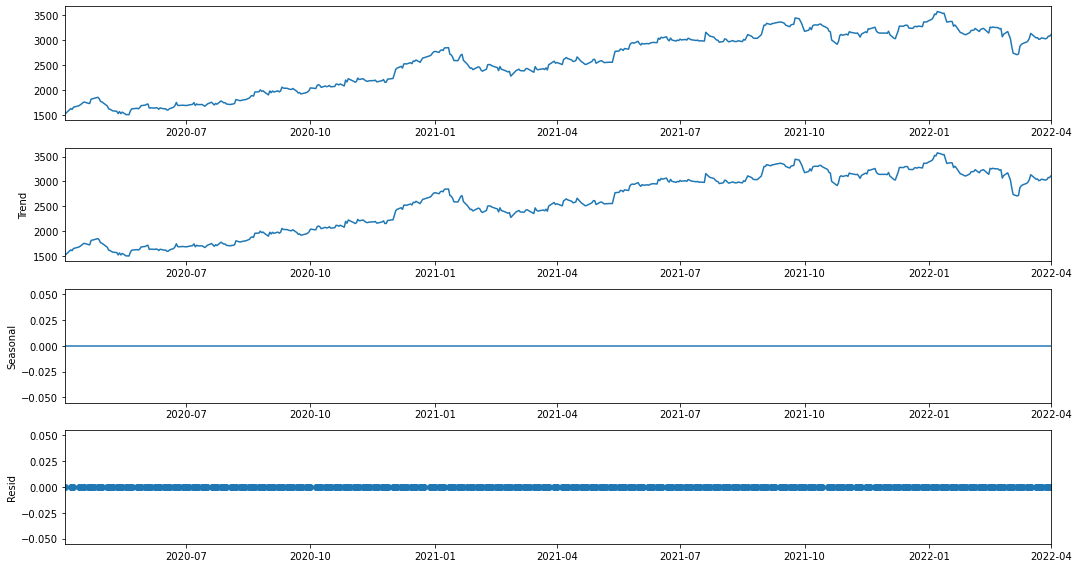

In [18]:
decomp_add = seasonal_decompose(df,model='additive', period=1)
decomp_add.plot();

## Decomposition : Multiplicative

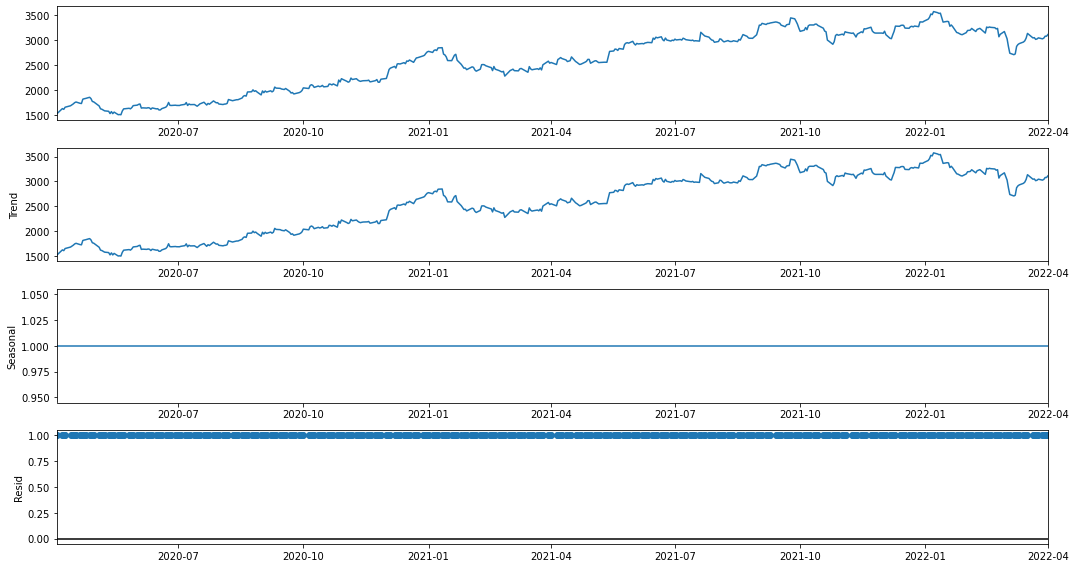

In [19]:
decomp_mult = seasonal_decompose(df,model='multiplicative', period=1)
decomp_mult.plot();

In [20]:
from   statsmodels.tsa.api   import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [21]:
import statsmodels.tools.eval_measures as  em
from   sklearn.metrics  import  mean_squared_error

In [22]:
train = df[df.index<='2021-09-30'] # 75-25 split
test = df[df.index>'2021-09-30']

In [23]:
train.shape

(372, 1)

In [24]:
test.shape

(125, 1)

In [25]:
df.shape

(497, 1)

In [26]:
train.tail()

,close
Date,
2021-09-24,3448.60
2021-09-27,3430.65
2021-09-28,3379.70
2021-09-29,3323.05
2021-09-30,3244.65


In [27]:
test.head()

,close
Date,
2021-10-01,3177.85
2021-10-04,3201.60
2021-10-05,3254.75
2021-10-06,3212.25
2021-10-07,3290.85


### Simple Exp smoothing

In [30]:
model_ses = SimpleExpSmoothing(train,initialization_method='estimated')

In [31]:
model_ses_autofit = model_ses.fit(optimized=True)

In [33]:
model_ses_autofit.params

{'smoothing_level': 0.9694771583136609,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1524.0270197056084,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [34]:
ses_predict = model_ses_autofit.forecast(steps=len(test))

In [36]:
ses_predict

372    3247.097229
373    3247.097229
374    3247.097229
375    3247.097229
376    3247.097229
          ...     
492    3247.097229
493    3247.097229
494    3247.097229
495    3247.097229
496    3247.097229
Length: 125, dtype: float64

In [37]:
ses_predict15 = model_ses_autofit.forecast(steps=len(test)+15) # Predict extra next 15 days

In [38]:
ses_predict15

372    3247.097229
373    3247.097229
374    3247.097229
375    3247.097229
376    3247.097229
          ...     
507    3247.097229
508    3247.097229
509    3247.097229
510    3247.097229
511    3247.097229
Length: 140, dtype: float64

In [238]:
ses_pred_list= list(ses_predict15)
len(ses_pred_list)

140

In [39]:
test.head()

,close
Date,
2021-10-01,3177.85
2021-10-04,3201.60
2021-10-05,3254.75
2021-10-06,3212.25
2021-10-07,3290.85


In [40]:
test_ind= list(test.index)
test_ind

[Timestamp('2021-10-01 00:00:00'),
 Timestamp('2021-10-04 00:00:00'),
 Timestamp('2021-10-05 00:00:00'),
 Timestamp('2021-10-06 00:00:00'),
 Timestamp('2021-10-07 00:00:00'),
 Timestamp('2021-10-08 00:00:00'),
 Timestamp('2021-10-11 00:00:00'),
 Timestamp('2021-10-12 00:00:00'),
 Timestamp('2021-10-13 00:00:00'),
 Timestamp('2021-10-14 00:00:00'),
 Timestamp('2021-10-18 00:00:00'),
 Timestamp('2021-10-19 00:00:00'),
 Timestamp('2021-10-20 00:00:00'),
 Timestamp('2021-10-21 00:00:00'),
 Timestamp('2021-10-22 00:00:00'),
 Timestamp('2021-10-25 00:00:00'),
 Timestamp('2021-10-26 00:00:00'),
 Timestamp('2021-10-27 00:00:00'),
 Timestamp('2021-10-28 00:00:00'),
 Timestamp('2021-10-29 00:00:00'),
 Timestamp('2021-11-01 00:00:00'),
 Timestamp('2021-11-02 00:00:00'),
 Timestamp('2021-11-03 00:00:00'),
 Timestamp('2021-11-04 00:00:00'),
 Timestamp('2021-11-08 00:00:00'),
 Timestamp('2021-11-09 00:00:00'),
 Timestamp('2021-11-10 00:00:00'),
 Timestamp('2021-11-11 00:00:00'),
 Timestamp('2021-11-

In [41]:
date15= pd.date_range(start='04/02/2022', end= '04/16/2022', freq='D')
date15

DatetimeIndex(['2022-04-02', '2022-04-03', '2022-04-04', '2022-04-05',
               '2022-04-06', '2022-04-07', '2022-04-08', '2022-04-09',
               '2022-04-10', '2022-04-11', '2022-04-12', '2022-04-13',
               '2022-04-14', '2022-04-15', '2022-04-16'],
              dtype='datetime64[ns]', freq='D')

In [42]:
len(date15)

15

In [43]:
l = list(date15)
l

[Timestamp('2022-04-02 00:00:00', freq='D'),
 Timestamp('2022-04-03 00:00:00', freq='D'),
 Timestamp('2022-04-04 00:00:00', freq='D'),
 Timestamp('2022-04-05 00:00:00', freq='D'),
 Timestamp('2022-04-06 00:00:00', freq='D'),
 Timestamp('2022-04-07 00:00:00', freq='D'),
 Timestamp('2022-04-08 00:00:00', freq='D'),
 Timestamp('2022-04-09 00:00:00', freq='D'),
 Timestamp('2022-04-10 00:00:00', freq='D'),
 Timestamp('2022-04-11 00:00:00', freq='D'),
 Timestamp('2022-04-12 00:00:00', freq='D'),
 Timestamp('2022-04-13 00:00:00', freq='D'),
 Timestamp('2022-04-14 00:00:00', freq='D'),
 Timestamp('2022-04-15 00:00:00', freq='D'),
 Timestamp('2022-04-16 00:00:00', freq='D')]

In [44]:
s= test_ind+ l
len(s)

140

In [45]:
s

[Timestamp('2021-10-01 00:00:00'),
 Timestamp('2021-10-04 00:00:00'),
 Timestamp('2021-10-05 00:00:00'),
 Timestamp('2021-10-06 00:00:00'),
 Timestamp('2021-10-07 00:00:00'),
 Timestamp('2021-10-08 00:00:00'),
 Timestamp('2021-10-11 00:00:00'),
 Timestamp('2021-10-12 00:00:00'),
 Timestamp('2021-10-13 00:00:00'),
 Timestamp('2021-10-14 00:00:00'),
 Timestamp('2021-10-18 00:00:00'),
 Timestamp('2021-10-19 00:00:00'),
 Timestamp('2021-10-20 00:00:00'),
 Timestamp('2021-10-21 00:00:00'),
 Timestamp('2021-10-22 00:00:00'),
 Timestamp('2021-10-25 00:00:00'),
 Timestamp('2021-10-26 00:00:00'),
 Timestamp('2021-10-27 00:00:00'),
 Timestamp('2021-10-28 00:00:00'),
 Timestamp('2021-10-29 00:00:00'),
 Timestamp('2021-11-01 00:00:00'),
 Timestamp('2021-11-02 00:00:00'),
 Timestamp('2021-11-03 00:00:00'),
 Timestamp('2021-11-04 00:00:00'),
 Timestamp('2021-11-08 00:00:00'),
 Timestamp('2021-11-09 00:00:00'),
 Timestamp('2021-11-10 00:00:00'),
 Timestamp('2021-11-11 00:00:00'),
 Timestamp('2021-11-

In [47]:
ses_pred_cust15= pd.DataFrame(index= s ,data= ses_predict15.values) # Dataframe with Extra 15 days
ses_pred_cust15

,0
2021-10-01,3247.097229
2021-10-04,3247.097229
2021-10-05,3247.097229
2021-10-06,3247.097229
2021-10-07,3247.097229
...,...
2022-04-12,3247.097229
2022-04-13,3247.097229
2022-04-14,3247.097229
2022-04-15,3247.097229


In [49]:
ses_pred_cust= pd.DataFrame(index= test_ind ,data= ses_predict.values) # Forecast length= Test length
ses_pred_cust

,0
2021-10-01,3247.097229
2021-10-04,3247.097229
2021-10-05,3247.097229
2021-10-06,3247.097229
2021-10-07,3247.097229
...,...
2022-03-28,3247.097229
2022-03-29,3247.097229
2022-03-30,3247.097229
2022-03-31,3247.097229


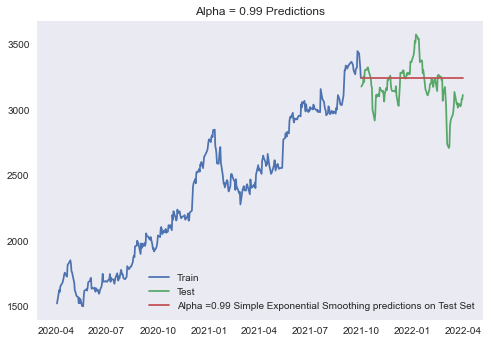

In [183]:
## Plotting the Training data, Test data and the forecasted values
plt.style.use('seaborn')
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(ses_pred_cust, label='Alpha =0.99 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.99 Predictions');

In [51]:
ses_pred_cust15.tail(15)

,0
2022-04-02,3247.097229
2022-04-03,3247.097229
2022-04-04,3247.097229
2022-04-05,3247.097229
2022-04-06,3247.097229
2022-04-07,3247.097229
2022-04-08,3247.097229
2022-04-09,3247.097229
2022-04-10,3247.097229
2022-04-11,3247.097229


In [174]:
#Next 15 days prediction using SES

ses_15= ses_pred_cust15.tail(15)

In [55]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [61]:
print('SES MSE :',em.mse(test.values,ses_predict.values)[0])
print('SES RMSE :',em.rmse(test.values,ses_predict.values)[0])
print('SES MAPE :',MAPE(test.values,ses_predict.values))

SES MSE : 29154.258963714856
SES RMSE : 170.74618286718697
SES MAPE : 4.175889339514514


In [62]:
resultsDf = pd.DataFrame({'Test RMSE': [em.rmse(test.values,ses_predict.values)[0]]},index=['Alpha=0.99,SES'])
resultsDf

,Test RMSE
"Alpha=0.99,SES",170.746183


## Double Exponential

In [63]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.9488683716125038, 'smoothing_trend': 0.022698987054326047, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1552.9298514636114, 'initial_trend': 4.774953931134821, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [64]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))
DES_predict

372    3253.092930
373    3257.052831
374    3261.012732
375    3264.972633
376    3268.932534
          ...     
492    3728.281059
493    3732.240960
494    3736.200861
495    3740.160762
496    3744.120663
Length: 125, dtype: float64

In [65]:
DES_pred_cust= pd.DataFrame(index= test_ind ,data= DES_predict.values) # Forecast length= Test length
DES_pred_cust

,0
2021-10-01,3253.092930
2021-10-04,3257.052831
2021-10-05,3261.012732
2021-10-06,3264.972633
2021-10-07,3268.932534
...,...
2022-03-28,3728.281059
2022-03-29,3732.240960
2022-03-30,3736.200861
2022-03-31,3740.160762


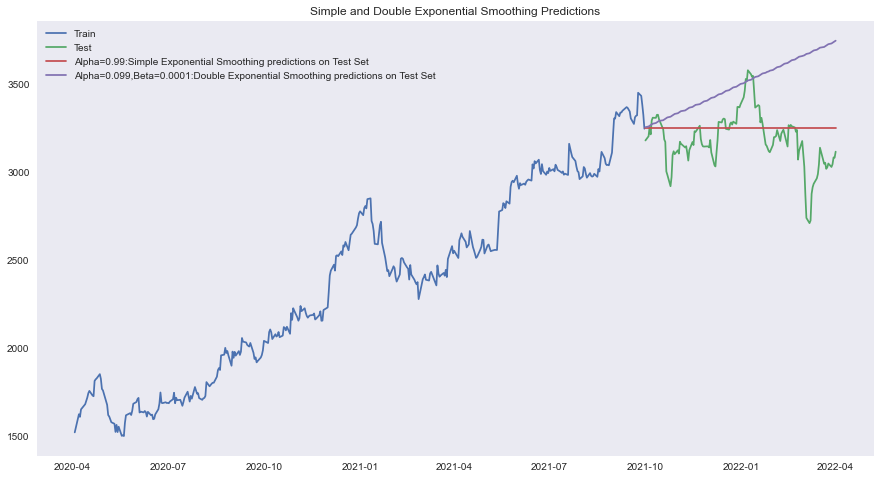

In [181]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(ses_pred_cust, label='Alpha=0.99:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_pred_cust, label='Alpha=0.099,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

In [68]:
print('DES MSE :',em.mse(test.values,DES_predict.values)[0])
print('DES RMSE :',em.rmse(test.values,DES_predict.values)[0])
print('DES MAPE :',MAPE(test.values,DES_predict.values))

DES MSE : 29944.145489543356
DES RMSE : 173.04376755475292
DES MAPE : 10.505365214018788


In [168]:
resultsDf_temp = pd.DataFrame({'Test RMSE': em.rmse(test.values,DES_predict.values)[0]}
                           ,index=['Alpha=1,Beta=0.0001:DES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.99,SES",170.746183
"Alpha=1,Beta=0.0001:DES",173.043768


In [ ]:
# Next 15 days prediction (DES)

In [170]:
DES_predict15 = model_DES.forecast(len(test)+15) # Predict extra next 15 days
DES_predict15

372    3253.092930
373    3257.052831
374    3261.012732
375    3264.972633
376    3268.932534
          ...     
507    3787.679575
508    3791.639476
509    3795.599377
510    3799.559278
511    3803.519179
Length: 140, dtype: float64

In [171]:
DES_pred_cust15= pd.DataFrame(index= s ,data= DES_predict15.values) # Dataframe with Extra 15 days
DES_pred_cust15

,0
2021-10-01,3253.092930
2021-10-04,3257.052831
2021-10-05,3261.012732
2021-10-06,3264.972633
2021-10-07,3268.932534
...,...
2022-04-12,3787.679575
2022-04-13,3791.639476
2022-04-14,3795.599377
2022-04-15,3799.559278


In [175]:
DES_15= DES_pred_cust15.tail(15)

## Triple Exponential (Holt-Winters)

In [155]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated', seasonal_periods=2 )
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.9302465770034603, 'smoothing_trend': 0.03990840561954146, 'smoothing_seasonal': 0.000314728789964276, 'damping_trend': nan, 'initial_level': 1583.2240511594496, 'initial_trend': 3.5996485926353303, 'initial_seasons': array([-5.91408819, -2.86125875]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [156]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(test))
TES_predict

372    3250.268789
373    3255.649438
374    3254.865243
375    3260.245892
376    3259.461697
          ...     
492    3526.056022
493    3531.436670
494    3530.652476
495    3536.033124
496    3535.248929
Length: 125, dtype: float64

In [157]:
TES_pred_cust= pd.DataFrame(index= test_ind ,data= TES_predict.values) # Forecast length= Test length
TES_pred_cust

,0
2021-10-01,3250.268789
2021-10-04,3255.649438
2021-10-05,3254.865243
2021-10-06,3260.245892
2021-10-07,3259.461697
...,...
2022-03-28,3526.056022
2022-03-29,3531.436670
2022-03-30,3530.652476
2022-03-31,3536.033124


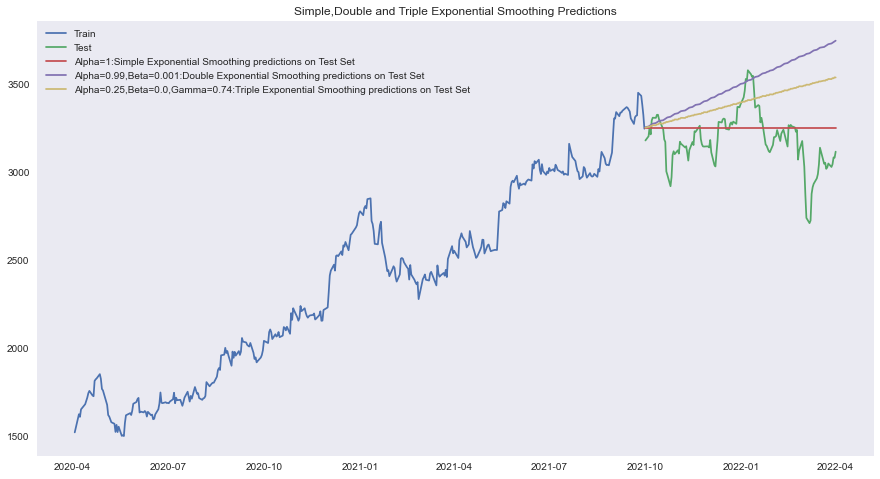

In [180]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(ses_pred_cust, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_pred_cust, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_pred_cust, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [159]:
print('TES MSE :',em.mse(test.values,TES_predict.values)[0])
print('TES RMSE :',em.rmse(test.values,TES_predict.values)[0])
print('TES MAPE :',MAPE(test.values,TES_predict.values))

TES MSE : 29563.13016531254
TES RMSE : 171.93932117265248
TES MAPE : 7.478609917990915


In [169]:
resultsDf_temp = pd.DataFrame({'Test RMSE': em.rmse(test.values,TES_predict.values)[0]}
                           ,index=['Alpha=0.25,Beta=0.0001:TES,Gamma=0.74:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.99,SES",170.746183
"Alpha=1,Beta=0.0001:DES",173.043768
"Alpha=0.25,Beta=0.0001:TES,Gamma=0.74:TES",171.939321


In [ ]:
# Next 15 days prediction (DES)

In [172]:
TES_predict15 = model_TES.forecast(len(test)+15) # Predict extra next 15 days
TES_predict15

372    3250.268789
373    3255.649438
374    3254.865243
375    3260.245892
376    3259.461697
          ...     
507    3563.611847
508    3562.827653
509    3568.208301
510    3567.424107
511    3572.804755
Length: 140, dtype: float64

In [173]:
TES_pred_cust15= pd.DataFrame(index= s ,data= TES_predict15.values) # Dataframe with Extra 15 days
TES_pred_cust15

,0
2021-10-01,3250.268789
2021-10-04,3255.649438
2021-10-05,3254.865243
2021-10-06,3260.245892
2021-10-07,3259.461697
...,...
2022-04-12,3563.611847
2022-04-13,3562.827653
2022-04-14,3568.208301
2022-04-15,3567.424107


In [176]:
TES_15= TES_pred_cust15.tail(15)

## Plotting the forecast for next 15 days using SES,DES,TES

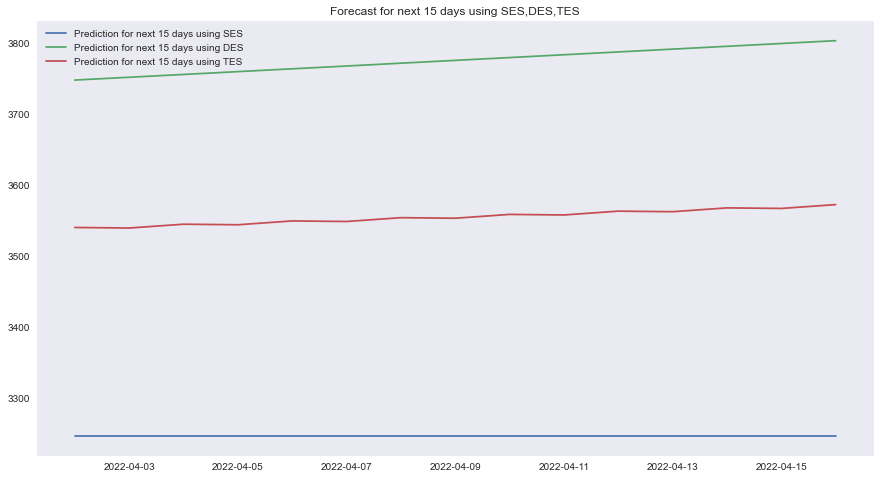

In [179]:
## Plotting the forecast for next 15 days using SES,DES,TES


plt.plot(ses_15, label='Prediction for next 15 days using SES')
plt.plot(DES_15, label='Prediction for next 15 days using DES')
plt.plot(TES_15, label='Prediction for next 15 days using TES')

plt.legend(loc='best')
plt.grid()
plt.title('Forecast for next 15 days using SES,DES,TES');

In [188]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima.model  import ARIMA

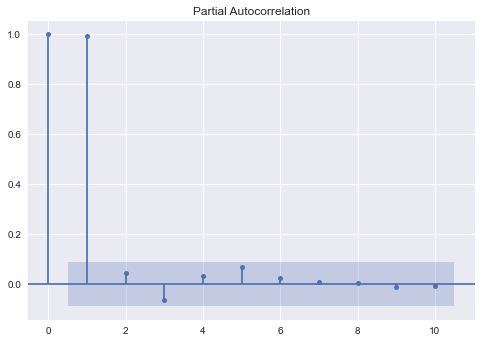

In [191]:
## Auto Correlation Function plot
plot_pacf(df, lags=10, ax=plt.gca());

## Stationary Test (Adfuller)

In [204]:
from statsmodels.tsa.stattools import adfuller

H0: Data is not stationary

H1: Data is stationary

In [205]:
statioonary_test = adfuller(df, autolag='AIC')
statioonary_test

(-1.5557650810675587,
 0.505767213156513,
 0,
 496,
 {'1%': -3.4436029548776395,
  '5%': -2.867384756137026,
  '10%': -2.5698830308597813},
 5011.410946750081)

since p value (0.505) is > alpha --> fail to reject H0;

Hence we can conclude that the data is not sationary

In [ ]:
## AR Model with 1 lag

In [193]:
ar1model= ARIMA(df, order=[1,0,0]).fit()
ar1model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  close   No. Observations:                  497
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -2608.381
Date:                Wed, 06 Apr 2022   AIC                           5222.763
Time:                        19:58:58   BIC                           5235.389
Sample:                             0   HQIC                          5227.719
                                - 497                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2573.7509    544.007      4.731      0.000    1507.517    3639.985
ar.L1          0.9980      0.003    311.541      0.000       0.992       1.004
sigma2      2095.1701     89.015     23.537      0.000    1920.703    2269.637
===================================================================================
Ljung-Box (L1) (Q):                   0.43   Jarque-Bera (JB):               127.26
Prob(Q):                              0.51   Prob(JB):                         0.00
Heteroskedasticity (H):               2.36   Skew:                             0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
## AR Model with 2 lags

In [194]:
ar2model= ARIMA(df, order=[2,0,0]).fit()
ar2model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  close   No. Observations:                  497
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -2607.932
Date:                Wed, 06 Apr 2022   AIC                           5223.863
Time:                        19:59:05   BIC                           5240.698
Sample:                             0   HQIC                          5230.471
                                - 497                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2573.7992    528.717      4.868      0.000    1537.533    3610.066
ar.L1          1.0407      0.040     26.234      0.000       0.963       1.118
ar.L2         -0.0428      0.039     -1.086      0.277      -0.120       0.034
sigma2      2091.6765     89.591     23.347      0.000    1916.082    2267.271
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):               123.89
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               2.30   Skew:                             0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Result: AR2 is having slightly lower AIC value, but as.L2 variable is not significant in AR2 model

In [ ]:
## Moving Average 1

In [195]:
ma1model= ARIMA(df, order=[0,0,1]).fit()
ma1model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  close   No. Observations:                  497
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -3554.998
Date:                Wed, 06 Apr 2022   AIC                           7115.995
Time:                        20:01:30   BIC                           7128.621
Sample:                             0   HQIC                          7120.951
                                - 497                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2573.7551     28.648     89.840      0.000    2517.606    2629.904
ma.L1          0.9517      0.016     57.931      0.000       0.919       0.984
sigma2      9.515e+04   9568.151      9.944      0.000    7.64e+04    1.14e+05
===================================================================================
Ljung-Box (L1) (Q):                 397.18   Jarque-Bera (JB):                29.08
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                            -0.23
Prob(H) (two-sided):                  0.05   Kurtosis:                         1.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
## Moving Average 2

In [196]:
ma2model= ARIMA(df, order=[0,0,2]).fit()
ma2model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  close   No. Observations:                  497
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -3321.289
Date:                Wed, 06 Apr 2022   AIC                           6650.578
Time:                        20:01:51   BIC                           6667.413
Sample:                             0   HQIC                          6657.186
                                - 497                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2573.6560     29.407     87.520      0.000    2516.020    2631.292
ma.L1          1.4733      0.030     49.440      0.000       1.415       1.532
ma.L2          0.8529      0.030     28.331      0.000       0.794       0.912
sigma2      3.706e+04   3529.483     10.499      0.000    3.01e+04     4.4e+04
===================================================================================
Ljung-Box (L1) (Q):                 248.63   Jarque-Bera (JB):                26.34
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.76   Skew:                            -0.18
Prob(H) (two-sided):                  0.08   Kurtosis:                         1.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## MA2 is having lower AIC value and all the variables are significant

In [197]:
import itertools
p = q = range(0, 4)
d= range(0,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2]) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Model...')
print('Model: {}{}'.format(pdq[1], model_pdq[1]))
print('Model: {}{}'.format(pdq[1], model_pdq[2]))
print('Model: {}{}'.format(pdq[2], model_pdq[3]))
print('Model: {}{}'.format(pdq[2], model_pdq[4]))

Examples of parameter combinations for Model...
Model: (0, 0, 1)(0, 0, 1)
Model: (0, 0, 1)(0, 0, 2)
Model: (0, 0, 2)(0, 0, 3)
Model: (0, 0, 2)(0, 1, 0)


In [198]:
arima_AIC= pd.DataFrame(columns=['param', 'AIC'])
arima_AIC

,param,AIC


In [199]:
for param in pdq:
    arima_mod= ARIMA(df, order=param).fit()
    print('ARIMA{} - AIC: {}'.format(param,arima_mod.aic))
    arima_AIC= arima_AIC.append({'param':param, 'AIC':arima_mod.aic}, ignore_index=True)

ARIMA(0, 0, 0) - AIC: 7748.885107877204
ARIMA(0, 0, 1) - AIC: 7115.995458568637
ARIMA(0, 0, 2) - AIC: 6650.578224233797
ARIMA(0, 0, 3) - AIC: 6319.611730264492
ARIMA(0, 1, 0) - AIC: 5203.088230072282
ARIMA(0, 1, 1) - AIC: 5204.352253422356
ARIMA(0, 1, 2) - AIC: 5201.840475750023
ARIMA(0, 1, 3) - AIC: 5203.838404429634
ARIMA(1, 0, 0) - AIC: 5222.762994370653
ARIMA(1, 0, 1) - AIC: 5223.99890545264
ARIMA(1, 0, 2) - AIC: 5221.35068191764
ARIMA(1, 0, 3) - AIC: 5223.350414912928
ARIMA(1, 1, 0) - AIC: 5204.223978623556
ARIMA(1, 1, 1) - AIC: 5205.16783000108
ARIMA(1, 1, 2) - AIC: 5203.839776858663
ARIMA(1, 1, 3) - AIC: 5204.402822107033
ARIMA(2, 0, 0) - AIC: 5223.8631987549
ARIMA(2, 0, 1) - AIC: 5226.471289745335
ARIMA(2, 0, 2) - AIC: 5223.350580866509
ARIMA(2, 0, 3) - AIC: 5225.350585329011
ARIMA(2, 1, 0) - AIC: 5202.593653770706
ARIMA(2, 1, 1) - AIC: 5204.528678988128
ARIMA(2, 1, 2) - AIC: 5203.7597999931395
ARIMA(2, 1, 3) - AIC: 5204.940865551281
ARIMA(3, 0, 0) - AIC: 5222.109119060591
ARIM

In [200]:
arima_AIC.sort_values(by='AIC', ascending=True)

,param,AIC
6,"(0, 1, 2)",5201.840476
20,"(2, 1, 0)",5202.593654
4,"(0, 1, 0)",5203.088230
22,"(2, 1, 2)",5203.759800
7,"(0, 1, 3)",5203.838404
14,"(1, 1, 2)",5203.839777
12,"(1, 1, 0)",5204.223979
5,"(0, 1, 1)",5204.352253
15,"(1, 1, 3)",5204.402822
28,"(3, 1, 0)",5204.411226


## Result: (0,1,2) order of (p,d,q) is giving the lowest AIC value

In [202]:
from pmdarima import auto_arima

In [203]:
auto_arima(df, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.76 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=5404.030, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=5264.668, Time=0.16 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.34 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=5403.999, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=5224.873, Time=0.38 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.23 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.52 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=5223.316, Time=0.25 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=5262.724, Time=0.11 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=0.97 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.58 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=5224.960, Time=0.42 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=inf, Time=2.25 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=5225.300, T

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [207]:
train.shape

(372, 1)

In [208]:
test.shape

(125, 1)

In [212]:
#ARIMA model --> order(0,1,2)

model_AR=  ARIMA(train, order= (0,1,2))

#Fitting the model
model_AR= model_AR.fit()
model_AR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  close   No. Observations:                  372
Model:                 ARIMA(0, 1, 2)   Log Likelihood               -1909.849
Date:                Wed, 06 Apr 2022   AIC                           3825.698
Time:                        20:38:08   BIC                           3837.447
Sample:                             0   HQIC                          3830.364
                                - 372                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0235      0.051     -0.459      0.646      -0.124       0.077
ma.L2          0.1052      0.056      1.871      0.061      -0.005       0.215
sigma2      1729.0501     79.609     21.719      0.000    1573.018    1885.082
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):               158.00
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               1.79   Skew:                             0.74
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [213]:
start1= len(train)
end1= len(train) + len(test) -1

AR_predict =  model_AR.predict(start= start1, end= end1,typ= 'levels') 
print(AR_predict)

372    3240.409471
373    3232.735136
374    3232.735136
375    3232.735136
376    3232.735136
          ...     
492    3232.735136
493    3232.735136
494    3232.735136
495    3232.735136
496    3232.735136
Name: predicted_mean, Length: 125, dtype: float64


In [214]:
AR_pred_cust= pd.DataFrame(index= test_ind ,data= AR_predict.values) # Forecast length= Test length
AR_pred_cust

,0
2021-10-01,3240.409471
2021-10-04,3232.735136
2021-10-05,3232.735136
2021-10-06,3232.735136
2021-10-07,3232.735136
...,...
2022-03-28,3232.735136
2022-03-29,3232.735136
2022-03-30,3232.735136
2022-03-31,3232.735136


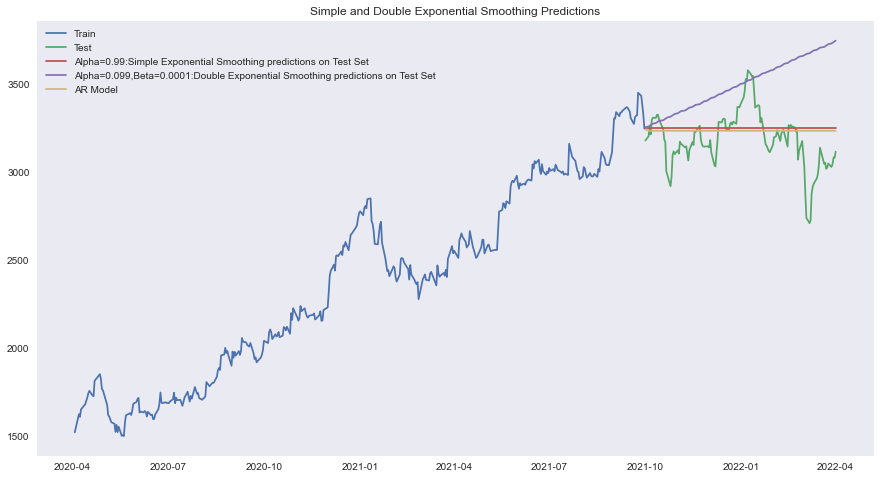

In [217]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(ses_pred_cust, label='Alpha=0.99:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_pred_cust, label='Alpha=0.099,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')
plt.plot(AR_pred_cust, label='AR Model')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');